In [1]:
import os
%env OPENBLAS_NUM_THREADS=1
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

nltk.download('punkt')
nltk.download('stopwords')


env: OPENBLAS_NUM_THREADS=1


[nltk_data] Downloading package punkt to /home/cwy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/cwy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
def preprocess(raw_text):
    raw_text = raw_text.lower()  # 转化为小写
    words = word_tokenize(raw_text)  # 分词
    words = [word for word in words if word.isalpha()]  # 去除非字母字符
    stop_words = set(stopwords.words('english'))  # 获取停用词表
    words = [word for word in words if word not in stop_words]  # 去除停用词
    clean_text = ' '.join(words)  # 合并成一个新的字符串
    return clean_text

def read_data():
    texts=[]
    for f1 in os.listdir("../data/20news"):
        for f2 in os.listdir("../data/20news/"+f1):
            fp="../data/20news/"+f1+"/"+f2
            try:
                with open(fp, mode="r", encoding="utf-8") as f:
                    text="".join(f.readlines())
                    texts.append(text)
            except:
                pass
    return texts



In [3]:
# 读取数据 
raw_texts=read_data()
preprocessed_texts = [preprocess(raw_text) for raw_text in raw_texts]
print(f"count of texts: {len(preprocessed_texts)}")

count of texts: 18756


In [4]:
# 向量化
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_texts)

# 聚类
k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

/home/cwy/miniconda3/envs/cwy_py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=20, random_state=42)

In [5]:
# 分析结果
silhouette_coefficient = silhouette_score(X, kmeans.labels_)
ch_index = calinski_harabasz_score(X.toarray(), kmeans.labels_)
print("Silhouette Coefficient:", silhouette_coefficient)
print("Calinski-Harabasz Index:", ch_index)

Silhouette Coefficient: 0.005702419785734724
Calinski-Harabasz Index: 23.382172419798053


In [6]:
# 可视化
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X.toarray())
# plt.savefig("result.png")

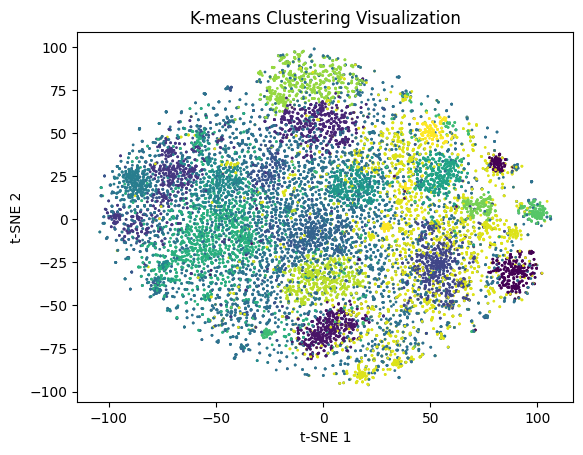

In [9]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=kmeans.labels_, cmap='viridis', s=1)
plt.title('K-means Clustering Visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()